# I. Stylized Facts 

In [1]:
# import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Setting up the data
adausdD = pd.read_csv('ADA-USD_Daily.csv', index_col= ['Date'])
bnbusdD = pd.read_csv('BNB-USD_Daily.csv', index_col= ['Date'])
btcusdD = pd.read_csv('BTC-USD_Daily.csv', index_col= ['Date'])
bchusdD = pd.read_csv('BCH-USD_Daily.csv', index_col= ['Date'])
dogeusdD = pd.read_csv('DOGE-USD_Daily.csv', index_col= ['Date'])
ethusdD = pd.read_csv('ETH-USD_Daily.csv', index_col= ['Date'])
ltcusdD = pd.read_csv('LTC-USD_Daily.csv', index_col= ['Date'])
xrpusdD = pd.read_csv('XRP-USD_Daily.csv', index_col= ['Date'])

adausdD.index = pd.to_datetime(adausdD.index)
bnbusdD.index = pd.to_datetime(bnbusdD.index)
bchusdD.index = pd.to_datetime(bchusdD.index)
btcusdD.index = pd.to_datetime(btcusdD.index)
dogeusdD.index = pd.to_datetime(dogeusdD.index)
ethusdD.index = pd.to_datetime(ethusdD.index)
ltcusdD.index = pd.to_datetime(ltcusdD.index)
xrpusdD.index = pd.to_datetime(xrpusdD.index)

In [3]:
# Translate to Mid-price.
# See lecture note 1, 8 assets

ADA  = ((adausdD['High'] + adausdD['Low'])/2).dropna()
BNB  = ((bnbusdD['High'] + bnbusdD['Low'])/2).loc['2017-10-01':'2021-05-15'].dropna()
BCH  = ((bchusdD['High'] + bchusdD['Low'])/2).loc['2017-10-01':'2021-05-15'].dropna()
BTC  = ((btcusdD['High'] + btcusdD['Low'])/2).loc['2017-10-01':'2021-05-15'].dropna()
DOGE = ((dogeusdD['High'] + dogeusdD['Low'])/2).loc['2017-10-01':'2021-05-15'].dropna()
ETH  = ((ethusdD['High'] + ethusdD['Low'])/2).loc['2017-10-01':'2021-05-15'].dropna()
LTC  = ((ltcusdD['High'] + ltcusdD['Low'])/2).loc['2017-10-01':'2021-05-15'].dropna()
XRP  = ((xrpusdD['High'] + xrpusdD['Low'])/2).loc['2017-10-01':'2021-05-15'].dropna()

In [4]:
# Obtain log-returns for 8 cryptocurrencies.
ADA_log_returns = np.log(ADA/ADA.shift(1)).dropna()
BNB_log_returns = np.log(BNB/BNB.shift(1)).dropna()
BCH_log_returns = np.log(BCH/BCH.shift(1)).dropna()
BTC_log_returns = np.log(BTC/BTC.shift(1)).dropna()
DOGE_log_returns = np.log(DOGE/DOGE.shift(1)).dropna()
ETH_log_returns = np.log(ETH/ETH.shift(1)).dropna()
LTC_log_returns = np.log(LTC/LTC.shift(1)).dropna()
XRP_log_returns = np.log(XRP/XRP.shift(1)).dropna()

In [5]:
# Get weekly log-returns
ADA_log_returns_w  = ADA_log_returns.resample('W').sum()
BNB_log_returns_w  = BNB_log_returns.resample('W').sum()
BCH_log_returns_w  = BCH_log_returns.resample('W').sum()
BTC_log_returns_w  = BTC_log_returns.resample('W').sum()
DOGE_log_returns_w = DOGE_log_returns.resample('W').sum()
ETH_log_returns_w  = ETH_log_returns.resample('W').sum()
LTC_log_returns_w  = LTC_log_returns.resample('W').sum()
XRP_log_returns_w  = XRP_log_returns.resample('W').sum()

In [6]:
# Get monthly log-returns
ADA_log_returns_m  = ADA_log_returns.resample('M').sum()
BNB_log_returns_m  = BNB_log_returns.resample('M').sum()
BCH_log_returns_m  = BCH_log_returns.resample('M').sum()
BTC_log_returns_m  = BTC_log_returns.resample('M').sum()
DOGE_log_returns_m = DOGE_log_returns.resample('M').sum()
ETH_log_returns_m  = ETH_log_returns.resample('M').sum()
LTC_log_returns_m  = LTC_log_returns.resample('M').sum()
XRP_log_returns_m  = XRP_log_returns.resample('M').sum()

# 1. Normality Tests

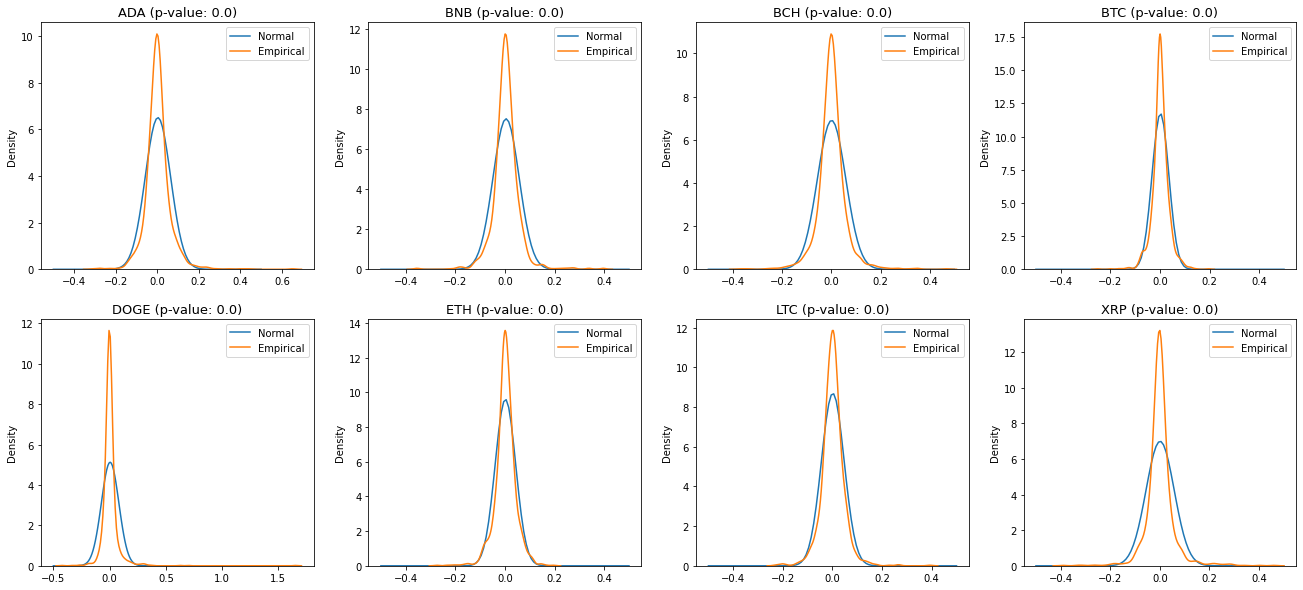

In [ ]:
# Compare data plots vs normal

datasets = [ADA_log_returns, BNB_log_returns, BCH_log_returns, BTC_log_returns, DOGE_log_returns, ETH_log_returns, LTC_log_returns, XRP_log_returns]
names = ['ADA', 'BNB', 'BCH', 'BTC', 'DOGE', 'ETH', 'LTC', 'XRP']


fig, axes = plt.subplots(2,4, figsize=(22.5,10))
axes = axes.flatten()

for i, ax in enumerate(axes):   
    mu, std = stats.norm.fit(datasets[i])
    x = np.linspace(-0.5, 0.5, 100)
    p = stats.norm.pdf(x, mu, std)
    ax.plot(x, p, label= 'Normal')

    sns.kdeplot(datasets[i], ax= ax, label= 'Empirical')

    JB_test = stats.jarque_bera(datasets[i])[1]
    ax.set_title(names[i] +' (p-value: '+str(JB_test)+")",fontsize=13)
    ax.legend()

# 2. Aggregational Normality

In [ ]:
# Define datasets of daily, weekly, monthly returns 
datasets = [ADA_log_returns, BNB_log_returns, BCH_log_returns, BTC_log_returns, DOGE_log_returns, ETH_log_returns, LTC_log_returns, XRP_log_returns]
datasets_w = [ADA_log_returns_w, BNB_log_returns_w, BCH_log_returns_w, BTC_log_returns_w, DOGE_log_returns_w, ETH_log_returns_w, LTC_log_returns_w, XRP_log_returns_w]
datasets_m = [ADA_log_returns_m, BNB_log_returns_m, BCH_log_returns_m, BTC_log_returns_m, DOGE_log_returns_m, ETH_log_returns_m, LTC_log_returns_m, XRP_log_returns_m]

names = ['ADA', 'BNB', 'BCH', 'BTC', 'DOGE', 'ETH', 'LTC', 'XRP']


for i, ax in enumerate(datasets):   
  AD_test_d = stats.anderson(datasets[i])
  AD_test_w = stats.anderson(datasets_w[i])
  AD_test_m = stats.anderson(datasets_m[i])

  # perform Anderson Darling tests on each dataset per coin
  print('-----'+names[i]+'-----')
  print('Daily   | 1% Crit. Value: {:.3f} | 5% Crit. Value: {:.3f} | Stat: {:.3f}'.format(np.round(AD_test_d[1][4],4), np.round(AD_test_d[1][3],4),np.round(AD_test_d[0],3)))
  print('Weekly  | 1% Crit. Value: {:.3f} | 5% Crit. Value: {:.3f} | Stat: {:.3f}'.format(np.round(AD_test_w[1][4],4), np.round(AD_test_w[1][3],4),np.round(AD_test_w[0],3)))
  print('Monthly | 1% Crit. Value: {:.3f} | 5% Crit. Value: {:.3f} | Stat: {:.3f}'.format(np.round(AD_test_m[1][4],4), np.round(AD_test_m[1][3],4),np.round(AD_test_m[0],3)))
  print('\n')
  

-----ADA-----
Daily   | 1% Crit. Value: 1.089 | 5% Crit. Value: 0.915 | Stat: 31.962
Weekly  | 1% Crit. Value: 1.070 | 5% Crit. Value: 0.900 | Stat: 5.228
Monthly | 1% Crit. Value: 1.013 | 5% Crit. Value: 0.852 | Stat: 1.156


-----BNB-----
Daily   | 1% Crit. Value: 1.089 | 5% Crit. Value: 0.915 | Stat: 34.412
Weekly  | 1% Crit. Value: 1.070 | 5% Crit. Value: 0.900 | Stat: 6.795
Monthly | 1% Crit. Value: 1.013 | 5% Crit. Value: 0.852 | Stat: 1.635


-----BCH-----
Daily   | 1% Crit. Value: 1.089 | 5% Crit. Value: 0.915 | Stat: 34.108
Weekly  | 1% Crit. Value: 1.070 | 5% Crit. Value: 0.900 | Stat: 3.949
Monthly | 1% Crit. Value: 1.013 | 5% Crit. Value: 0.852 | Stat: 0.417


-----BTC-----
Daily   | 1% Crit. Value: 1.089 | 5% Crit. Value: 0.915 | Stat: 21.582
Weekly  | 1% Crit. Value: 1.070 | 5% Crit. Value: 0.900 | Stat: 1.713
Monthly | 1% Crit. Value: 1.013 | 5% Crit. Value: 0.852 | Stat: 0.546


-----DOGE-----
Daily   | 1% Crit. Value: 1.089 | 5% Crit. Value: 0.915 | Stat: 118.691
Weekl

# 3. Irregularity of Volatility

In [ ]:
# Find 30 days moving volatility
ADA_vol = ADA_log_returns.rolling(30).std().dropna()
BNB_vol = BNB_log_returns.rolling(30).std().dropna()
BCH_vol = BCH_log_returns.rolling(30).std().dropna()
BTC_vol = BTC_log_returns.rolling(30).std().dropna()
DOGE_vol = DOGE_log_returns.rolling(30).std().dropna()
ETH_vol = ETH_log_returns.rolling(30).std().dropna()
LTC_vol = LTC_log_returns.rolling(30).std().dropna()
XRP_vol = XRP_log_returns.rolling(30).std().dropna()

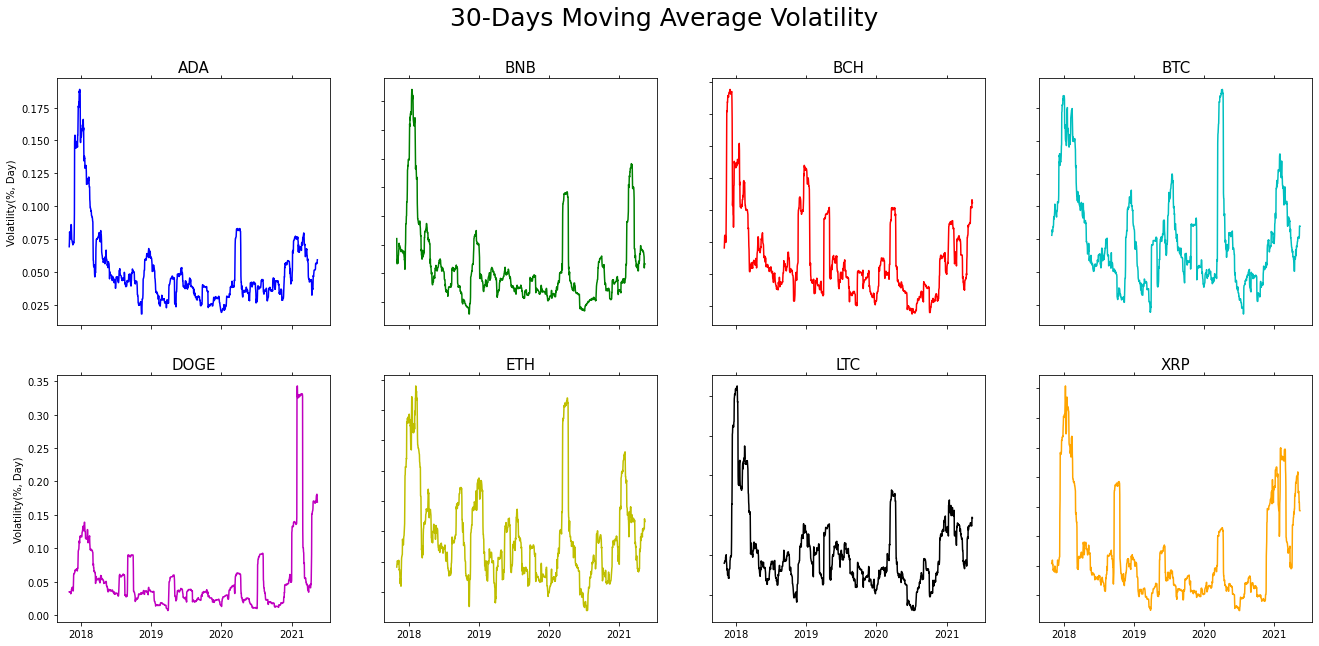

In [ ]:
# Volatility check
vol_sets = [ADA_vol, BNB_vol, BCH_vol, BTC_vol, DOGE_vol, ETH_vol, LTC_vol, XRP_vol]
color = ['b','g','r','c','m','y','k','orange']

fig, axes = plt.subplots(2,4, figsize=(22.5,10))
axes = axes.flatten()

fig.suptitle('30-Days Moving Average Volatility',fontsize=25)
for i, ax in enumerate(axes):   
    
    ax.plot(vol_sets[i],c=color[i])
    ax.set_title(names[i],fontsize=15)
    ax.set_xlabel(None)
    ax.set_ylabel('Volatility(%, Day)')
    ax.xaxis.set_tick_params(reset=True)
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


for ax in axes.flat:
    ax.label_outer()

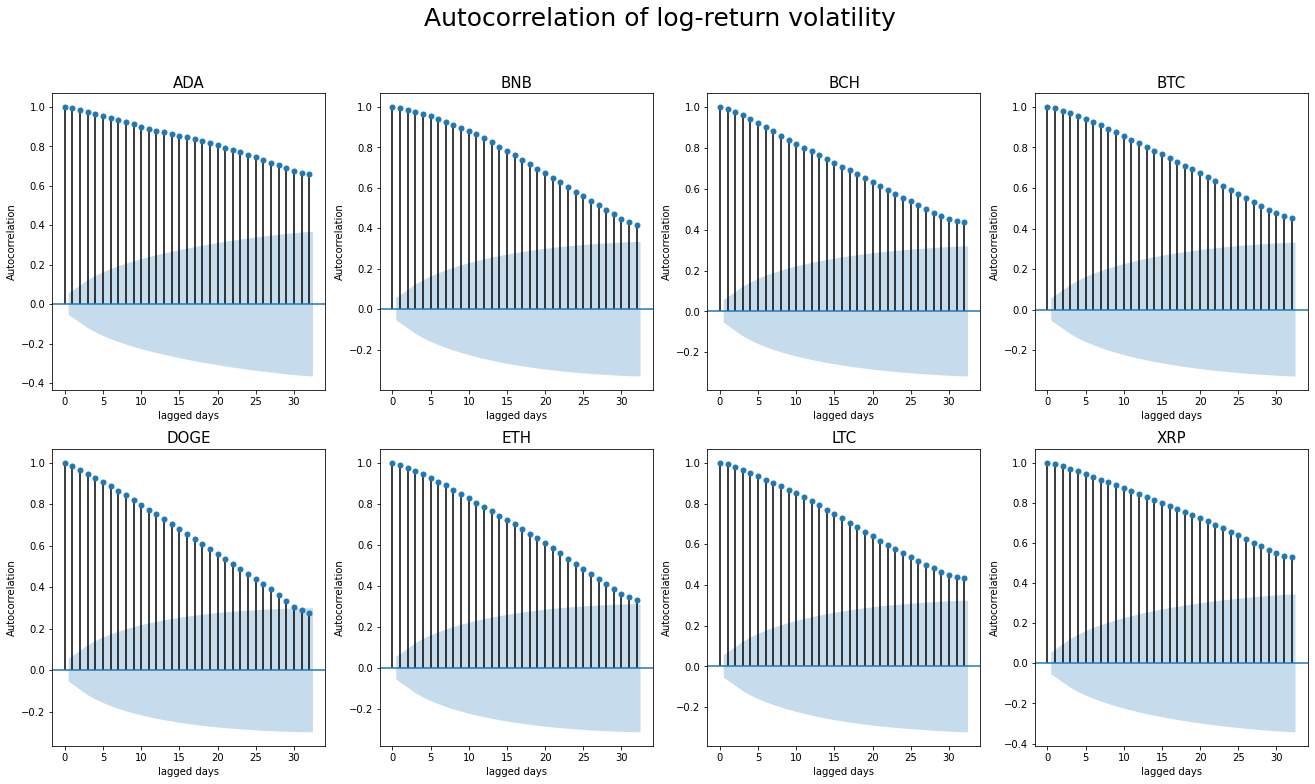

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(22.5,12))
axes = axes.flatten()
fig.suptitle('Autocorrelation of log-return volatility',fontsize=25)
for i, ax in enumerate(axes):   

    plot_acf(vol_sets[i],ax=ax)
    ax.set_title(names[i],fontsize=15)
    ax.set_xlabel('lagged days')
    ax.set_ylabel('Autocorrelation')


# 4. Absence of autocorrelations

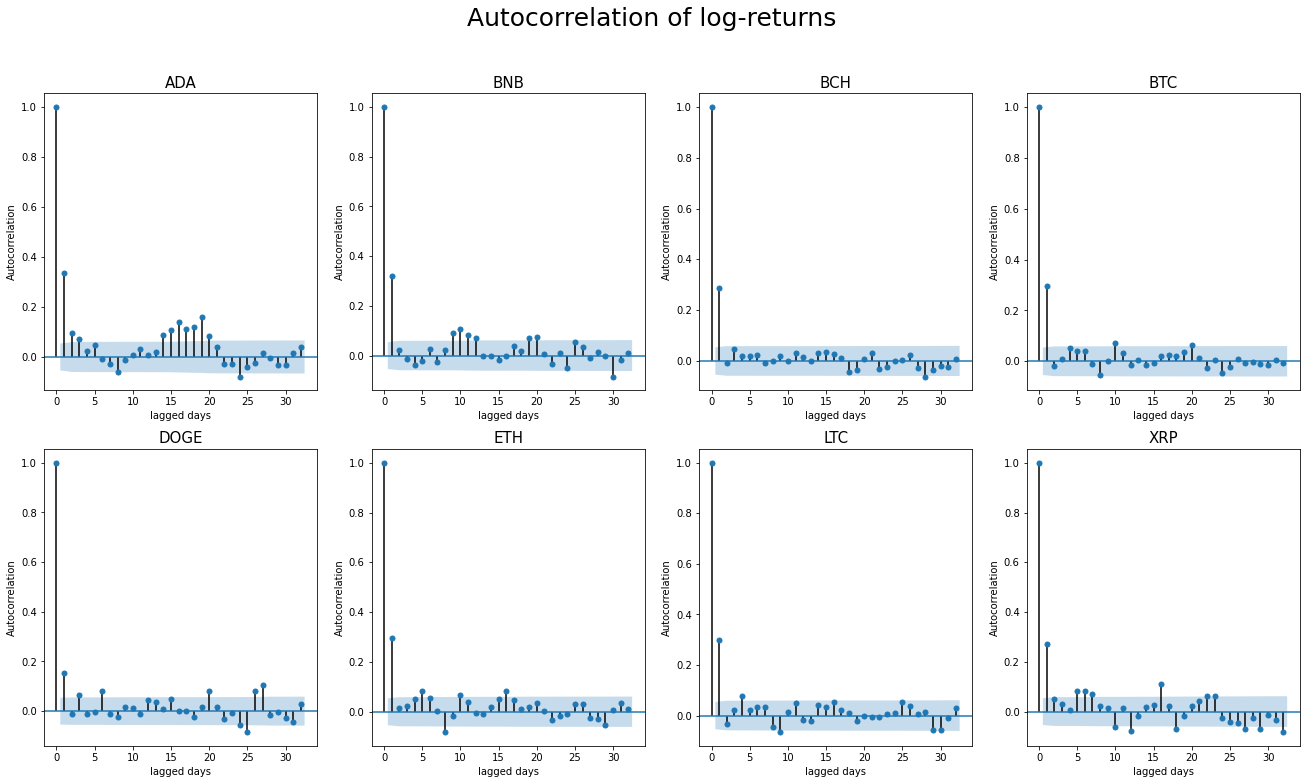

In [ ]:
# Set data
datasets = [ADA_log_returns, BNB_log_returns, BCH_log_returns, BTC_log_returns, DOGE_log_returns, ETH_log_returns, LTC_log_returns, XRP_log_returns]
names = ['ADA', 'BNB', 'BCH', 'BTC', 'DOGE', 'ETH', 'LTC', 'XRP']


fig, axes = plt.subplots(2,4, figsize=(22.5,12))
axes = axes.flatten()
fig.suptitle('Autocorrelation of log-returns',fontsize=25)
for i, ax in enumerate(axes):   

    plot_acf(datasets[i],ax=ax)
    ax.set_title(names[i],fontsize=15)
    ax.set_xlabel('lagged days')
    ax.set_ylabel('Autocorrelation')



# 5. Long-range Dependence

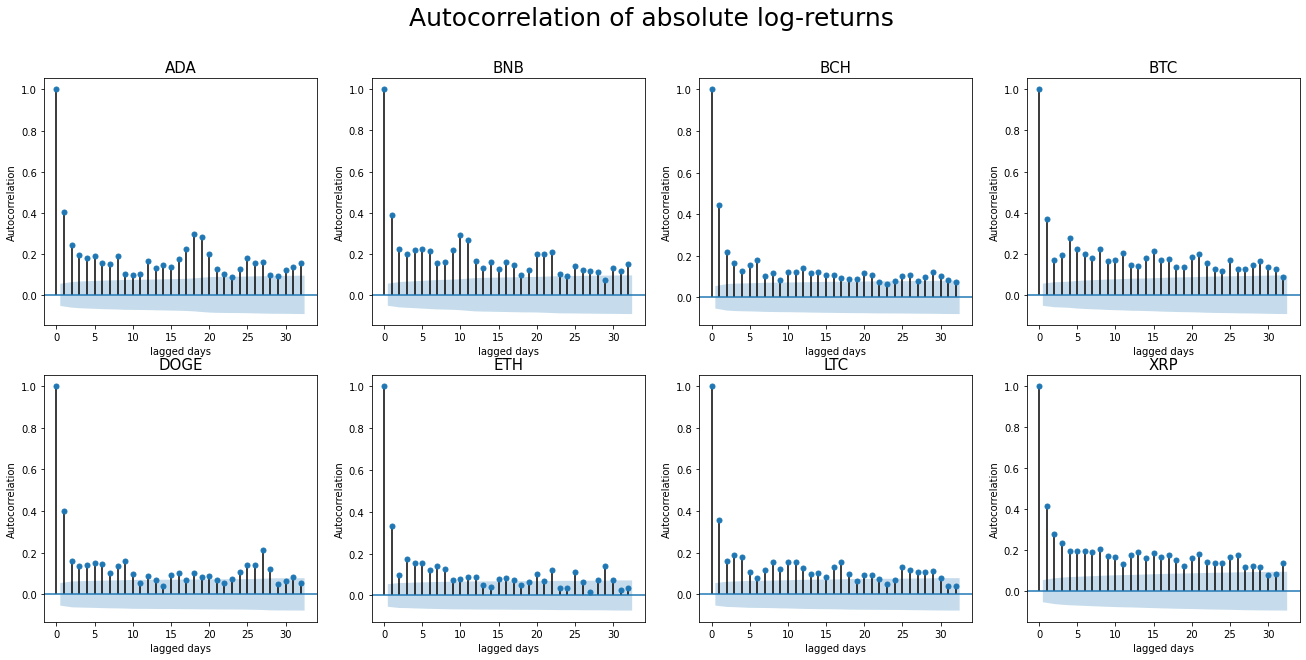

In [ ]:
# Set data
datasets = [ADA_log_returns, BNB_log_returns, BCH_log_returns, BTC_log_returns, DOGE_log_returns, ETH_log_returns, LTC_log_returns, XRP_log_returns]
names = ['ADA', 'BNB', 'BCH', 'BTC', 'DOGE', 'ETH', 'LTC', 'XRP']


fig, axes = plt.subplots(2,4, figsize=(22.5,10))
axes = axes.flatten()
fig.suptitle('Autocorrelation of absolute log-returns',fontsize=25)
for i, ax in enumerate(axes):   

    plot_acf(abs(datasets[i]),ax=ax)
    ax.set_title(names[i],fontsize=15)
    ax.set_xlabel('lagged days')
    ax.set_ylabel('Autocorrelation')


# 6. Stationarity

In [ ]:
#Setting up the data
prices = pd.concat([ADA,BCH,BNB,BTC,DOGE,ETH,LTC,XRP],axis=1)
prices.columns = ['ADA','BCH','BNB','BTC','DOGE','ETH','LTC','XRP']

for i in range(prices.shape[1]):   
     stats = sm.tsa.stattools.adfuller(prices.iloc[:,i])
     print('{} : test stat: {}, Crit. Values: {}'.format(names[i],round(stats[0],4),stats[4]))

ADA : test stat: 2.1399, Crit. Values: {'1%': -3.4354096984769003, '5%': -2.863774435037593, '10%': -2.567959628657891}
BNB : test stat: -2.5374, Crit. Values: {'1%': -3.435401880796999, '5%': -2.863770985550096, '10%': -2.567957791647768}
BCH : test stat: 3.3716, Crit. Values: {'1%': -3.435405786614854, '5%': -2.86377270896149, '10%': -2.567958709443111}
BTC : test stat: 1.498, Crit. Values: {'1%': -3.435378572037035, '5%': -2.863760700696655, '10%': -2.56795231450063}
DOGE : test stat: 3.6346, Crit. Values: {'1%': -3.4354096984769003, '5%': -2.863774435037593, '10%': -2.567959628657891}
ETH : test stat: 4.3128, Crit. Values: {'1%': -3.4354096984769003, '5%': -2.863774435037593, '10%': -2.567959628657891}
LTC : test stat: -0.7573, Crit. Values: {'1%': -3.435378572037035, '5%': -2.863760700696655, '10%': -2.56795231450063}
XRP : test stat: -3.5803, Crit. Values: {'1%': -3.4354096984769003, '5%': -2.863774435037593, '10%': -2.567959628657891}


# 7. Cointegration

In [ ]:
# Set log prices
log_prices = np.log(prices)

# Correlation Matrix
Cor_matrix = np.round(log_prices.corr(),3)
print(Cor_matrix)

        ADA    BCH    BNB    BTC   DOGE    ETH    LTC    XRP
ADA   1.000  0.657  0.644  0.774  0.851  0.927  0.849  0.764
BCH   0.657  1.000  0.051  0.384  0.426  0.705  0.800  0.726
BNB   0.644  0.051  1.000  0.780  0.791  0.561  0.489  0.301
BTC   0.774  0.384  0.780  1.000  0.817  0.838  0.697  0.363
DOGE  0.851  0.426  0.791  0.817  1.000  0.801  0.708  0.617
ETH   0.927  0.705  0.561  0.838  0.801  1.000  0.861  0.672
LTC   0.849  0.800  0.489  0.697  0.708  0.861  1.000  0.772
XRP   0.764  0.726  0.301  0.363  0.617  0.672  0.772  1.000


In [ ]:
print('Corr > 0.8')
print([Cor_matrix > 0.8])
print('\n')
print('Corr > 0.85')
print([Cor_matrix > 0.85])
print('\n')
print('Corr > 0.9')
print([Cor_matrix > 0.9])
print('\n')

Corr > 0.8
[        ADA    BCH    BNB    BTC   DOGE    ETH    LTC    XRP
ADA    True  False  False  False   True   True   True  False
BCH   False   True  False  False  False  False  False  False
BNB   False  False   True  False  False  False  False  False
BTC   False  False  False   True   True   True  False  False
DOGE   True  False  False   True   True   True  False  False
ETH    True  False  False   True   True   True   True  False
LTC    True  False  False  False  False   True   True  False
XRP   False  False  False  False  False  False  False   True]


Corr > 0.85
[        ADA    BCH    BNB    BTC   DOGE    ETH    LTC    XRP
ADA    True  False  False  False   True   True  False  False
BCH   False   True  False  False  False  False  False  False
BNB   False  False   True  False  False  False  False  False
BTC   False  False  False   True  False  False  False  False
DOGE   True  False  False  False   True  False  False  False
ETH    True  False  False  False  False   True   True  Fa

Highly correlated pairs\
(0.9) ADA-ETH\
(0.85) ADA-DOGE, ETH-LTC\
(0.8) BTC-DOGE, BTC-ETH, DOGE-ETH, ADA-LTC

In [ ]:
# Perform linear regression on highly correlated pairs. (intercept only if beta is negative.)
model1 = sm.OLS(log_prices['ADA'], sm.add_constant(log_prices['ETH'])).fit() # (y, X)
print(model1.summary())

model2 = sm.OLS(log_prices['ADA'], log_prices['DOGE']).fit() # (y, X)
print(model2.summary())

model3 = sm.OLS(log_prices['ETH'], log_prices['LTC']).fit() # (y, X) 94%
print(model3.summary())

model4 = sm.OLS(log_prices['BTC'], log_prices['DOGE']).fit() # (y, X) 94%
print(model4.summary())

model5 = sm.OLS(log_prices['BTC'], log_prices['ETH']).fit() # (y, X) 94%
print(model5.summary())

model6 = sm.OLS(log_prices['ADA'], log_prices['LTC']).fit() # (y, X) 94%
print(model6.summary())

model7 = sm.OLS(log_prices['DOGE'], log_prices['ETH']).fit() # (y, X) 94%
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    ADA   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     8035.
Date:                Thu, 03 Jun 2021   Prob (F-statistic):               0.00
Time:                        04:01:16   Log-Likelihood:                -627.73
No. Observations:                1319   AIC:                             1259.
Df Residuals:                    1317   BIC:                             1270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.1682      0.078   -117.941      0.0

In [ ]:
# Define spread by taking y - y_hat obtained from above linear regression.
spread1 = log_prices['ADA']  - model1.params[1] * log_prices['ETH'] - model1.params[0]
spread2 = log_prices['ADA']  - model2.params[0] * log_prices['DOGE'] 
spread3 = log_prices['ETH']  - model3.params[0] * log_prices['LTC']
spread4 = log_prices['BTC']  - model4.params[0] * log_prices['DOGE']
spread5 = log_prices['BTC']  - model5.params[0] * log_prices['ETH']
spread6 = log_prices['ADA']  - model6.params[0] * log_prices['LTC']
spread7 = log_prices['DOGE'] - model7.params[0] * log_prices['ETH']

In [ ]:
# Check stationarity of spreads
spreads = [spread1,spread2,spread3,spread4,spread5,spread6,spread7]
spread_names = ['ADA-ETH', 'ADA-DOGE','ETH-LTC','BTC-DOGE','BTC-ETH','ADA-LTC','DOGE-ETH']

for i, data in enumerate(spreads):   
     stats = sm.tsa.stattools.adfuller(data)
     print('{} : test stat: {:.4f}, Crit. Values: {}'.format(spread_names[i],stats[0],stats[4]))

ADA-ETH : test stat: -4.5948, Crit. Values: {'1%': -3.435405786614854, '5%': -2.86377270896149, '10%': -2.567958709443111}
ADA-DOGE : test stat: -2.3210, Crit. Values: {'1%': -3.435405786614854, '5%': -2.86377270896149, '10%': -2.567958709443111}
ETH-LTC : test stat: -2.3596, Crit. Values: {'1%': -3.4353440094155756, '5%': -2.8637454499962196, '10%': -2.5679441928400135}
BTC-DOGE : test stat: 1.3779, Crit. Values: {'1%': -3.4353478262263777, '5%': -2.863747134166378, '10%': -2.567945089732423}
BTC-ETH : test stat: -0.5743, Crit. Values: {'1%': -3.435405786614854, '5%': -2.86377270896149, '10%': -2.567958709443111}
ADA-LTC : test stat: -1.4702, Crit. Values: {'1%': -3.435394087237915, '5%': -2.8637675466967902, '10%': -2.5679559603022635}
DOGE-ETH : test stat: 1.8093, Crit. Values: {'1%': -3.4353516488758684, '5%': -2.8637488209107196, '10%': -2.5679459879960373}


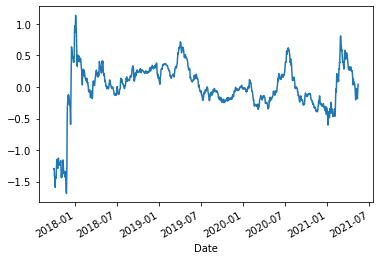

In [ ]:
# ONLY PAIR WHICH HAS CONINTEGRATED PRICES.
spread1.plot()

# II. Application: Pair trading strategy


As we have seen co-integration tests, there was only one pair (ADA-ETH) such that the linear combination of those is stationary time series.
We will explore whether we can use this fact to make a profitable trading strategy. In this section, we use ADA-ETH pair to build a very simple trading strategy. We use 50% of data as training, and the other as testing data.

In [12]:
# Get index to split the data
tr_idx = int(0.5 * len(ADA))

# Before building the spread, we need to chekc whether ADA and ETH is I(1).
# To test this, we find the difference of price and check whether it is stationary or not.
ADA2 = ADA.iloc[:tr_idx].diff(1).dropna() #1st diff
ETH2 = ETH.iloc[:tr_idx].diff(1).dropna()


# First, check ETH is non-stationary series 
# then check if the difference is stationary.
stats11 = sm.tsa.stattools.adfuller(ETH.iloc[:tr_idx]) # 50% data
stats12 = sm.tsa.stattools.adfuller(ETH2)
print('test stat: {:.4f}, Crit. Values: {}'.format(stats11[0],stats11[4]))
print('test stat: {:.4f}, Crit. Values: {}'.format(stats12[0],stats12[4]))


# Do the same for ADA.
stats21 = sm.tsa.stattools.adfuller(ADA.iloc[:tr_idx])
stats22 = sm.tsa.stattools.adfuller(ADA2)
print('test stat: {:.4f}, Crit. Values: {}'.format(stats21[0],stats21[4]))
print('test stat: {:.4f}, Crit. Values: {}'.format(stats22[0],stats22[4]))

test stat: -2.0184, Crit. Values: {'1%': -3.440641231176813, '5%': -2.8660808067889976, '10%': -2.569188186240308}
test stat: -4.0091, Crit. Values: {'1%': -3.440641231176813, '5%': -2.8660808067889976, '10%': -2.569188186240308}
test stat: -2.6697, Crit. Values: {'1%': -3.4405768522418607, '5%': -2.8660524488494903, '10%': -2.569173076930542}
test stat: -3.8548, Crit. Values: {'1%': -3.44065745275905, '5%': -2.8660879520543534, '10%': -2.5691919933016076}


In [13]:
# Find beta using OLS
model1_TR = sm.OLS(ETH.iloc[:tr_idx], ADA.iloc[:tr_idx]).fit() # (y, X)
beta = model1_TR.params[0]
print(beta) # train beta

1886.9724870204


test stat: -4.2963, Crit. Values: {'1%': -3.4406089407081604, '5%': -2.866066583404541, '10%': -2.5691806079101562}


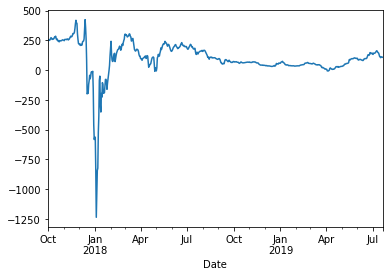

In [14]:
# Find the ADAETH spread on the training data.
spread_adaeth = ETH.iloc[:tr_idx] - beta * ADA.iloc[:tr_idx]

# Then apply ADF to check stationarity.
statsae = sm.tsa.stattools.adfuller(spread_adaeth)
print('test stat: {:.4f}, Crit. Values: {}'.format(statsae[0],statsae[4]))
spread_adaeth.plot()

In [21]:
# Get the mean and std. dev of training data
mu_ = spread_adaeth.mean()
std_ = spread_adaeth.std()

print(mu_)
print(std_)

95.77057715367238
149.09231696825148


In [16]:
# Get the spread based on training+test
spread_adaeth_all = ETH - beta * ADA

# Check stationarity. Stationary according to ADF
statsae = sm.tsa.stattools.adfuller(spread_adaeth_all)
print('test stat: {:.4f}, Crit. Values: {}'.format(statsae[0],statsae[4]))

test stat: -5.3863, Crit. Values: {'1%': -3.435405786614854, '5%': -2.86377270896149, '10%': -2.567958709443111}


In [17]:
# Center the spread to get mean 0.
spread_adaeth_all_n = spread_adaeth_all - mu_

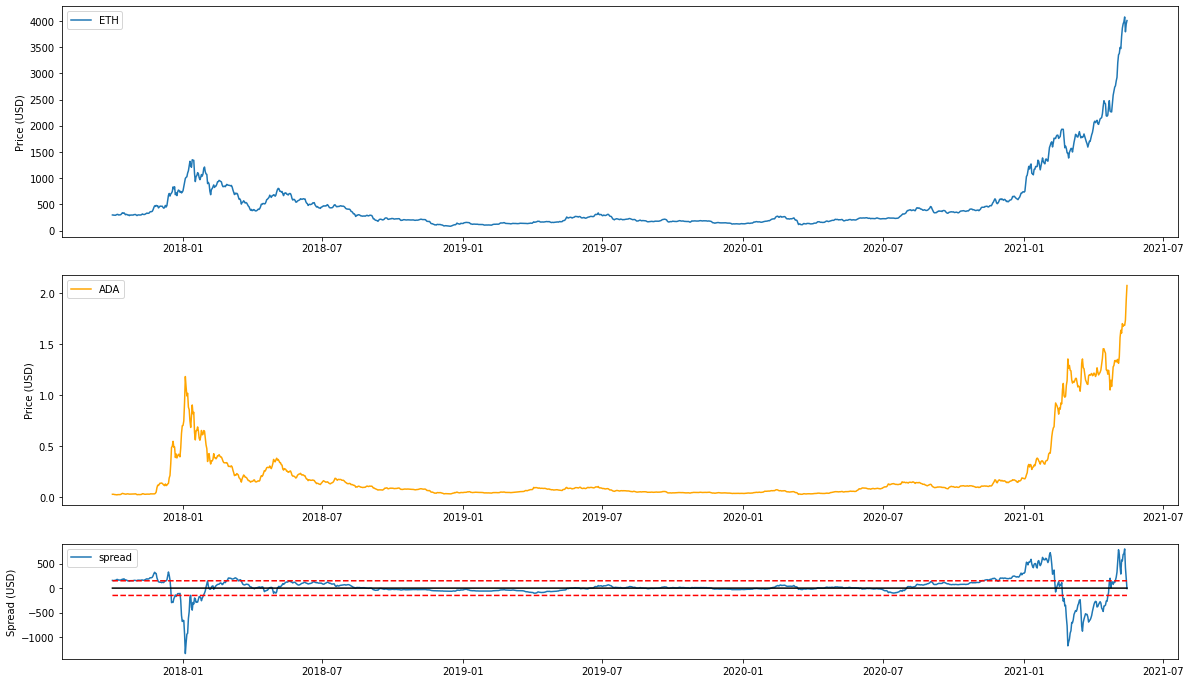

In [22]:
# Plot data and spread
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(20,12),gridspec_kw={'height_ratios': [2, 2, 1]})

ax1.plot(ETH, label='ETH')
ax1.set_ylabel('Price (USD)')
ax1.legend()

ax2.plot(ADA, label='ADA', color='orange')
ax2.set_ylabel('Price (USD)')
ax2.legend()

ax3.plot(spread_adaeth_all_n, label='spread')
ax3.plot(spread_adaeth_all_n.index,np.zeros(spread_adaeth_all.size) ,color='black')
ax3.plot(spread_adaeth_all_n.index,np.ones(spread_adaeth_all.size) * std_,'--',color='red')
ax3.plot(spread_adaeth_all_n.index,np.ones(spread_adaeth_all.size) * -std_,'--',color='red')
ax3.set_ylabel('Spread (USD)')
ax3.legend()

In [40]:
# Get trades using the pair trade strategy.
# We enter if spread crosses either +std or -std. (indicating long or short)
# Once we got in the position, we exit only if it crosses back the zero line.

ps = []
ti = []
et = []
ad = []
sp = []

pos = 0

for i in range(len(spread_adaeth_all_n)):

  if ((spread_adaeth_all_n.iloc[i] >= std_) or (spread_adaeth_all_n.iloc[i] <= -std_)) and pos == 0:
      pos += -int(np.sign((spread_adaeth_all_n.iloc[i])))
      ti.append(ETH.index[i])
      ps.append(pos)
      et.append(ETH.iloc[i])
      ad.append(ADA.iloc[i])
      sp.append(spread_adaeth_all_n.iloc[i])
  
  elif pos == -1 and (spread_adaeth_all_n.iloc[i] <= 0):
      pos = 0
      ps.append(pos)
      ti.append(ETH.index[i])
      et.append(ETH.iloc[i])
      ad.append(ADA.iloc[i])
      sp.append(spread_adaeth_all_n.iloc[i])
  
  elif pos == 1 and (spread_adaeth_all_n.iloc[i] >= 0):
      pos = 0
      ps.append(pos)
      ti.append(ETH.index[i])
      et.append(ETH.iloc[i])
      ad.append(ADA.iloc[i])
      sp.append(spread_adaeth_all_n.iloc[i])


trades = pd.DataFrame([ti,ps,et,ad,sp])
trades = trades.T
trades.columns = ['Date','Position','ETH','ADA','Spread']
trades

,Date,Position,ETH,ADA,Spread
0,2017-10-01,-1,299.127,0.02479,156.578
1,2017-12-16,0,699.586,0.325713,-10.7956
2,2017-12-17,1,716.031,0.485215,-295.327
3,2018-01-31,0,1081.58,0.510795,21.9543
4,2018-02-27,-1,881.678,0.33608,151.734
5,2018-04-03,0,401.25,0.164346,-4.63696
6,2020-11-07,-1,447.066,0.106298,150.715
7,2021-02-11,0,1757.61,0.922637,-79.153
8,2021-02-20,1,1933.41,1.05544,-153.947
9,2021-04-22,0,2478.53,1.19752,123.067


In [44]:
# Profit is equal to difference of spreads. Hence add all the absolute value of spreads.
profit = trades['Spread'].abs().sum()
profit

1358.1642747811893

In [36]:
trades.to_csv('trades.csv')